In [1]:
import numpy as np 
from Utils import *
from scipy.optimize import minimize
from iADM import *
import matplotlib.pyplot as plt

In [6]:
p=4
N=9
theta=0.5  ###Set Sparsity

              
a=np.random.normal(0,1,p)

x=BG(theta,N)*norm(a)              #### Bernouilli Gaussion 
a=a/norm(a)

y=Conv(a,x)

a0=pad(y,p)/norm(pad(y,p))   #### Padding and normalizing the truncated version of y
          


ypad=np.pad(y,(p,p),constant_values=0)      ### paded signal

lam=0.1/np.sqrt(p*theta)    ### Reguralization

f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2    ####Greedy initialization

x1=np.zeros(N+2*p)       
res = minimize(f_x_ini, x1, method='nelder-mead',
               options={'xatol': 1e-3})                 ####Greedy initialization

x0=res.x    

-4.932904012703012 -0.16251892949777494
30


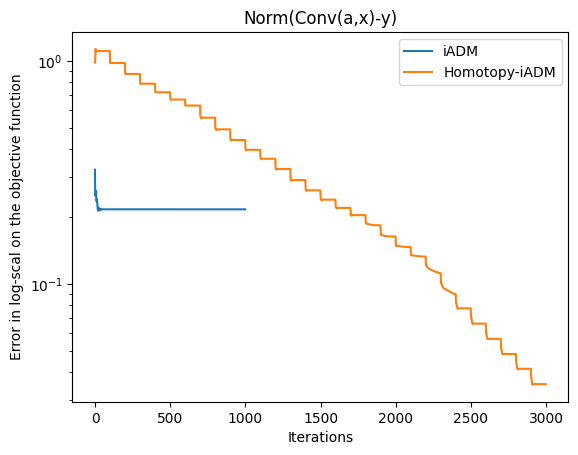

In [7]:
lam0=coherence(ypad)
lamf=0.01/np.sqrt(p*theta)
print(np.log(lamf/lam0),np.log(0.85))
At,Xt,E=homotopy(ypad,a0,x0,lam0,lamf)
A,X,L=iADM(ypad,a0,x0,1000,0.1/np.sqrt(theta*p),False)

plt.semilogy(L)
plt.semilogy(E)

# Label the two graphs
plt.legend(['iADM', 'Homotopy-iADM'])
plt.xlabel('Iterations')
plt.ylabel('Error in log-scal on the objective function')
plt.title('Norm(Conv(a,x)-y)')
plt.show()

QUESTION 4 : SUCCESS WHEN a INCOHERENT ( coherence(a)  is approximately 0) and x is sparse

In [124]:
p=7
N=20
theta=0.1/np.sqrt(p)  

               
a=np.random.normal(0,1,p)

x=BG(theta,N)     #### Bernouilli Gaussion 
a=a/norm(a)       #### Normalize
y=Conv(a,x)

while coherence(a) > 0.5/p or norm(pad(y,p)) == 0:   #### Choose incoherent solution

    a=np.random.normal(0,1,p)

    x=BG(theta,N)      
    a=a/norm(a)
    y=Conv(a,x)
print('The coherence of a',coherence(a))
y=Conv(a,x)
a0=pad(y,p)/norm(pad(y,p))                  #### Padding and normalizing the truncated version of y
x1=np.zeros(N+2*p)        

ypad=np.pad(y,(p,p),constant_values=0)

lam=0.1/np.sqrt(p*theta)    

f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2
 ####Greedy initialization

res = minimize(f_x_ini, x1, method='nelder-mead',
               options={'xatol': 1e-3})

x0=res.x 
A,X,L=iADM(ypad,a0,x0,1000,0.1/np.sqrt(theta*p),False)
a=np.pad(a,(0,2*p),constant_values=0)
x=np.pad(x,(0,2*p),constant_values=0)
A,sol1=shiftrecovery(a,A)
X,sol2=shiftrecovery(x,X)
                    

#### We consider that the algorithm suceeds when Max correlation is higher than 0.95
print(sol1, 'Max Correlation when a is incoherent')
err=norm(np.concatenate((A,X))-np.concatenate((a,x)))/(norm(np.concatenate((a,x))))
print(err)

The coherence of a 0.020394899643333728
0.9999999999999999 Max Correlation when a is incoherent
0.10482051464415461


QUESTION 4 : WHEN a is coherent and x is Moderatly unsparse

In [126]:
p=7                                                ###The higher we choose p the harder its difficult to choose a coherent a
N=20
theta=0.4

               
a=np.random.normal(0,1,p)                 ###Set Sparsity

x=BG(theta,N)                           #### Bernouilli Gaussion 
a=a/norm(a)
while np.abs(coherence(a)) < 1/np.sqrt(p)    or norm(pad(y,p)) == 0:   #### Choose coherent solution

    a=np.random.normal(0,1,p)

    x=BG(theta,N)     
    a=a/norm(a)
    y=Conv(a,x)
print('The coherence of a :',coherence(a)) 
y=Conv(a,x)

a0=pad(y,p)/norm(pad(y,p)) 
                                                    #### Padding and normalizing the truncated version of y
x1=np.zeros(N+2*p)        

ypad=np.pad(y,(p,p),constant_values=0)

lam=0.1/np.sqrt(p*theta)    

f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2        

res = minimize(f_x_ini, x1, method='nelder-mead',
               options={'xatol': 1e-3})                       ####Greedy initialization


x0=res.x 
                                                                         
A,X,L=iADM(ypad,a0,x0,1000,lam,False)


a=np.pad(a,(0,2*p))
x=np.pad(x,(0,2*p))
A,sol1=shiftrecovery(a,A )     
X,sol=shiftrecovery(x,X ) 
#### We consider that the algorithm suceeds when Max correlation is higher than 0.95
print(sol1, 'Max Correlation when a is coherent')

The coherence of a : 0.6237082025306572
0.6559496234149718 Max Correlation when a is coherent


In [105]:
print(a,'Ground Truth')
print(A,'Recovered Solution')

[-0.52295469  0.2335672  -0.26420015 -0.04894007  0.37381683  0.6114562
 -0.29351355  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.        ] Ground Truth
[-0.34352692  0.50901207 -0.21761603 -0.11665852 -0.05796807  0.2231808
 -0.14102392  0.17406001 -0.02387698  0.01530306  0.00077036 -0.01555288
  0.00576516  0.06506351  0.1533967   0.12746752 -0.1156879  -0.25097365
 -0.56962713  0.10588332 -0.03776006] Recovered Solution


In [120]:
#### Estimate the probability of recovery in function of p and theta 
#### Weak estimation of the probability due to low iteration number 

def draw(p,theta):
    N=30
    Success=0
    for i in range(5):        
        a=np.random.normal(0,1,p)
       
        x=BG(theta,N)
        a=a/norm(a) 
        y=Conv(a,x)
        while norm(pad(y,p)) == 0: 
            a=np.random.normal(0,1,p)
            
            x=BG(theta,N)
            a=a/norm(a)
            y=Conv(a,x)

        a0=pad(y,p)/norm(pad(y,p)) #### Padding and normalizing the truncated version of y
        x1=np.zeros(N+2*p)        

        ypad=np.pad(y,(p,p),constant_values=0)

        lam=0.1/np.sqrt(p*theta)    

        f_x_ini = lambda x: np.linalg.norm(x, 1) * lam + 0.5 * np.linalg.norm(Conv(a0, x) - ypad)**2    ####Greedy initialization

        res = minimize(f_x_ini, x1, method='nelder-mead',
                    options={'xatol': 1e-3})

        x0=res.x 
        
        A,X,L=iADM(ypad,a0,x0,500,lam)
        a=np.pad(a,(0,2*p),constant_values=0)
        x=np.pad(x,(0,2*p),constant_values=0)
        A,sol1=shiftrecovery(a,A)
        X,sol2=shiftrecovery(x,X)
        print(sol1)
        if sol1 > 0.95:
            Success+=1
    
    return Success/5

In [ ]:
##### Take too much time to compute
p=np.arange(5,12)
theta=np.linspace(0.1,0.9,7)
print(len(p),len(theta))
T=np.zeros((len(p),len(theta)))
for i in range(len(p)):
    for k in range(len(theta)):
        T[i][k]=draw( p[i],theta[k]) 

In [205]:
print(T[:5,:5])
B=T[:5,:5]

[[0.75 0.25 0.25 0.   0.  ]
 [0.5  0.25 0.25 0.   0.  ]
 [0.5  0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.  ]
 [0.5  0.   0.   0.   0.  ]]


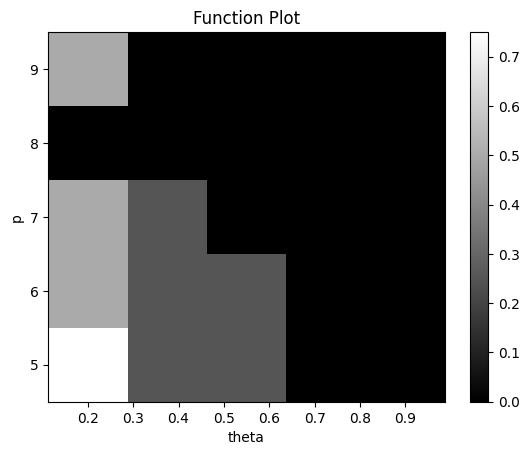

In [221]:


p=np.arange(5,10)
theta=np.linspace(0.2,0.9,5)
X, Y = np.meshgrid(theta, p)

# Plot the function values
plt.pcolormesh(X, Y, B, cmap='gray')  # Use pcolormesh to create a color plot
plt.colorbar()  # Add a colorbar
plt.xlabel('theta')  # Add x-axis label
plt.ylabel('p')  # Add y-axis label
plt.title('Probability of recovering signal in function of theta and p')  # Add plot title
plt.show()  # Display the plot